# Crime related to Corona Infections 

# Corona cases per County, Region and Statewide 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_corona = pd.read_csv('/Users/fabianbrockstedt/neuefische/crime_nerds/Data/New_York_State_Statewide_COVID-19_Testing_20240425.csv')


In [5]:
df_corona.head()

,Test Date,Geography Description,Geography Level,Total New Positives,Total Cases Per 100k,Total Cases Per 100k (7-day avg),New Positives PCR,Cases Per 100k PCR,New Positives Antigen,Cases Per 100k Antigen
0,04/21/2024,Albany,COUNTY,5,1.58,0.86,4,1.27,1,0.32
1,04/21/2024,Allegany,COUNTY,0,0.00,0.61,0,0.00,0,0.00
2,04/21/2024,Bronx,COUNTY,23,1.67,2.67,16,1.16,7,0.51
3,04/21/2024,Broome,COUNTY,0,0.00,1.67,0,0.00,0,0.00
4,04/21/2024,Cattaraugus,COUNTY,3,3.92,4.49,0,0.00,3,3.92


In [6]:
df_corona.columns = [col.lower().replace(' ', '_') for col in df_corona.columns]

In [7]:
df_corona = df_corona.drop(columns=['new_positives_antigen', 'cases_per_100k_antigen'])

In [8]:
df_corona['test_date'] = pd.to_datetime(df_corona['test_date'])


In [9]:
df_corona = df_corona[df_corona['test_date'] <= '2023-12-31']


In [10]:
df_corona['geography_level'].unique()

array(['COUNTY', 'REGION', 'STATEWIDE'], dtype=object)

In [11]:
df_corona['test_date'].unique()

<DatetimeArray>
['2023-12-31 00:00:00', '2023-12-30 00:00:00', '2023-12-29 00:00:00',
 '2023-12-28 00:00:00', '2023-12-27 00:00:00', '2023-12-26 00:00:00',
 '2023-12-25 00:00:00', '2023-12-24 00:00:00', '2023-12-23 00:00:00',
 '2023-12-22 00:00:00',
 ...
 '2020-03-10 00:00:00', '2020-03-09 00:00:00', '2020-03-08 00:00:00',
 '2020-03-07 00:00:00', '2020-03-06 00:00:00', '2020-03-05 00:00:00',
 '2020-03-04 00:00:00', '2020-03-03 00:00:00', '2020-03-02 00:00:00',
 '2020-03-01 00:00:00']
Length: 1401, dtype: datetime64[ns]

# Data by day -> Death and Case Count 

In [12]:
df_corona_daily = pd.read_csv('/Users/fabianbrockstedt/neuefische/crime_nerds/Data/data-by-day.csv')

In [13]:
df_corona_daily.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,...,SI_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_corona_daily.columns = [col.lower().replace(' ', '_') for col in df_corona_daily.columns]

In [15]:
df_corona_daily.rename(columns={'date_of_interest': 'date'}, inplace=True)


In [16]:
df_corona_daily = df_corona_daily.drop(columns=['hospitalized_count', 'probable_case_count','all_case_count_7day_avg', 'hosp_count_7day_avg','bx_probable_case_count', 'bx_hospitalized_count','bx_probable_case_count_7day_avg','bx_hospitalized_count_7day_avg','bk_probable_case_count', 'bk_hospitalized_count','bk_probable_case_count_7day_avg','bk_hospitalized_count_7day_avg','mn_probable_case_count','mn_hospitalized_count','mn_probable_case_count_7day_avg','mn_hospitalized_count_7day_avg','qn_probable_case_count','qn_hospitalized_count','qn_probable_case_count_7day_avg','qn_hospitalized_count_7day_avg','si_probable_case_count','si_hospitalized_count','si_probable_case_count_7day_avg','si_hospitalized_count_7day_avg','incomplete'])

In [17]:
df_corona_daily['date'] = pd.to_datetime(df_corona_daily['date'])


In [18]:
df_corona_daily.head()

,date,case_count,death_count,case_count_7day_avg,death_count_7day_avg,bx_case_count,bx_death_count,bx_case_count_7day_avg,bx_all_case_count_7day_avg,bx_death_count_7day_avg,...,qn_case_count,qn_death_count,qn_case_count_7day_avg,qn_all_case_count_7day_avg,qn_death_count_7day_avg,si_case_count,si_death_count,si_case_count_7day_avg,si_all_case_count_7day_avg,si_death_count_7day_avg
0,2020-02-29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2020-03-04,5,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


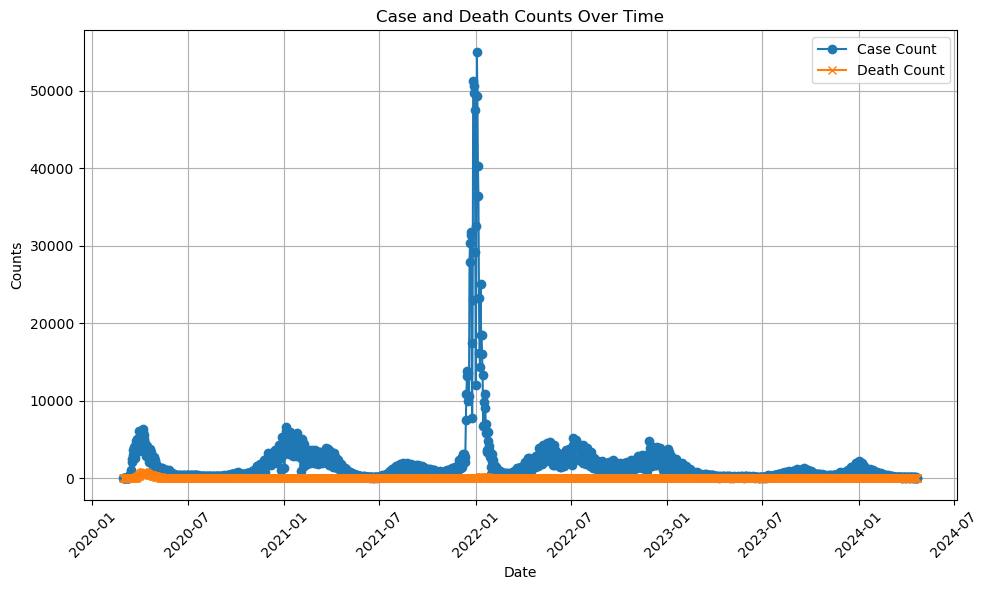

In [19]:
plt.figure(figsize=(10, 6))  # Set the size of the plot

plt.plot(df_corona_daily['date'], df_corona_daily['case_count'], label='Case Count', marker='o')  # Plot case count
plt.plot(df_corona_daily['date'], df_corona_daily['death_count'], label='Death Count', marker='x')  # Plot death count

plt.title('Case and Death Counts Over Time')  # Add a title
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Counts')  # Label the y-axis
plt.legend()  # Add a legend

plt.grid(True)  # Add a grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout

plt.show() 

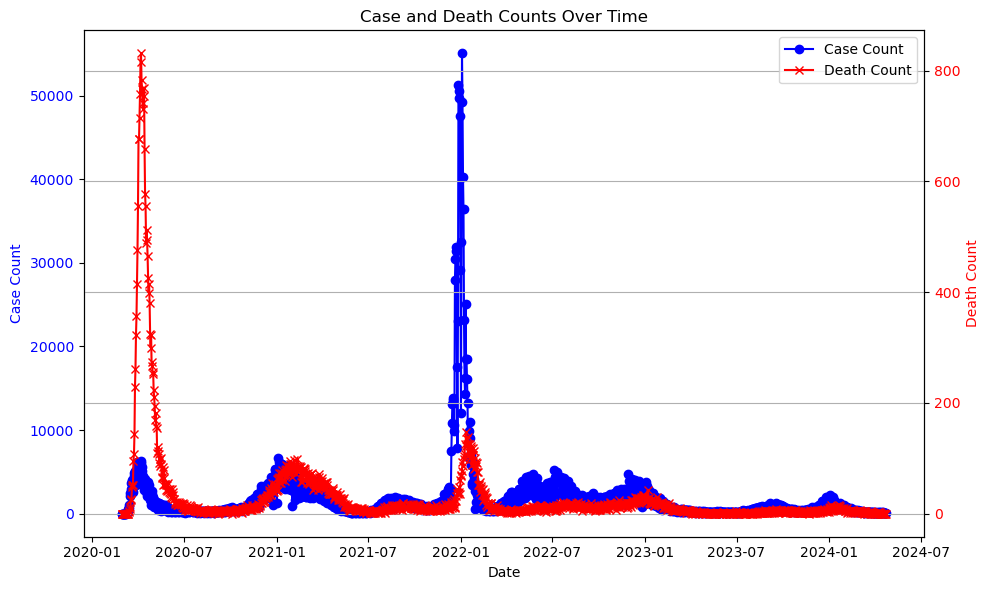

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 6))  # Create a figure and an axis

ax1.plot(df_corona_daily['date'], df_corona_daily['case_count'], color='b', marker='o', label='Case Count')  # Plot case count on the first y-axis
ax1.set_xlabel('Date')  # Label the x-axis
ax1.set_ylabel('Case Count', color='b')  # Label the y-axis
ax1.tick_params(axis='y', labelcolor='b')  # Set y-axis colors for the first metric

ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(df_corona_daily['date'], df_corona_daily['death_count'], color='r', marker='x', label='Death Count')  # Plot death count on the second y-axis
ax2.set_ylabel('Death Count', color='r')  # Label the second y-axis
ax2.tick_params(axis='y', labelcolor='r')  # Set y-axis colors for the second metric

plt.title('Case and Death Counts Over Time')  # Add a title
plt.grid(True)  # Add a grid
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
fig.tight_layout()  # Adjust layout

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)  # Add a legend
plt.show()  # Display the plot

# Case count between the different borrows 

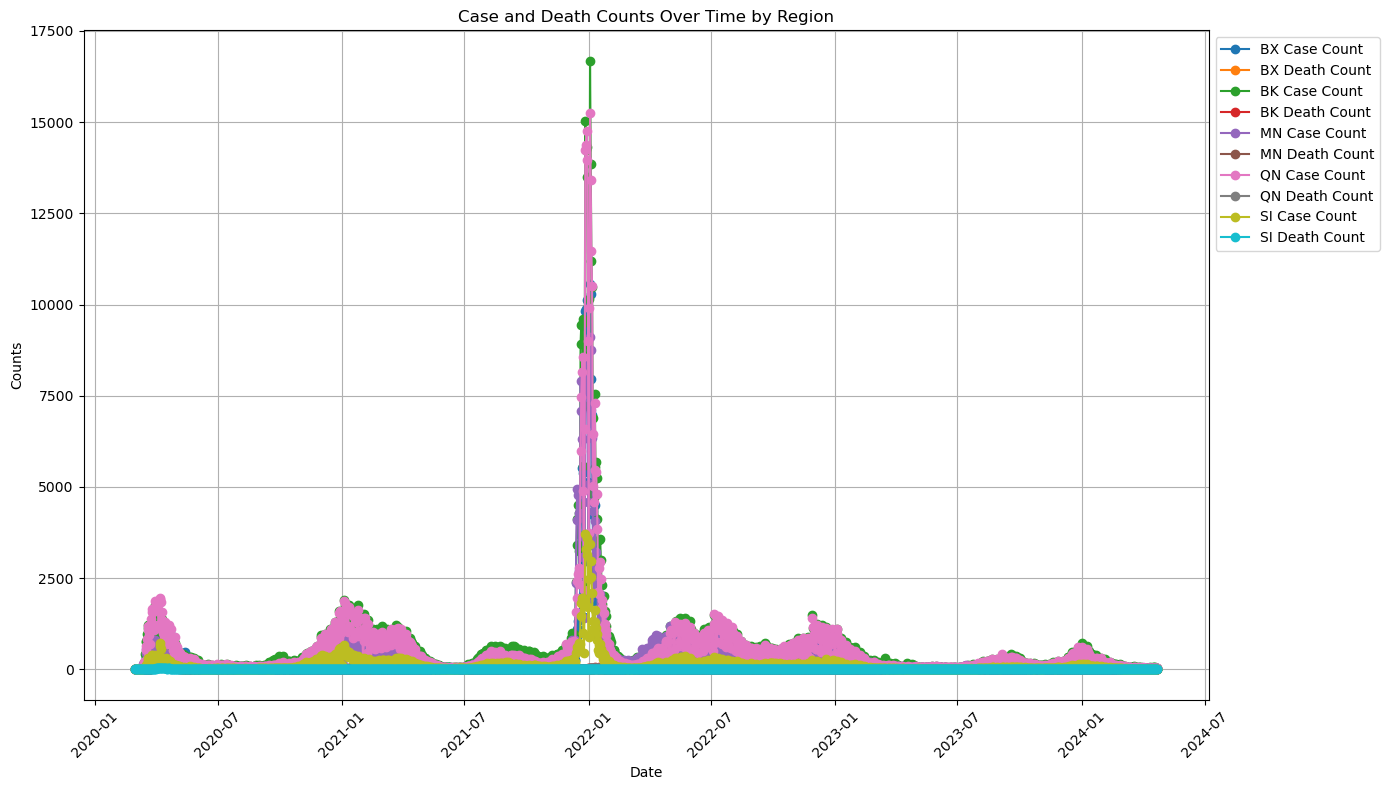

In [21]:
plt.figure(figsize=(14, 8))  # Set the size of the plot

# Plot each data series
plt.plot(df_corona_daily['date'], df_corona_daily['bx_case_count'], label='BX Case Count', marker='o')
plt.plot(df_corona_daily['date'], df_corona_daily['bx_death_count'], label='BX Death Count', marker='o')
plt.plot(df_corona_daily['date'], df_corona_daily['bk_case_count'], label='BK Case Count', marker='o')
plt.plot(df_corona_daily['date'], df_corona_daily['bk_death_count'], label='BK Death Count', marker='o')
plt.plot(df_corona_daily['date'], df_corona_daily['mn_case_count'], label='MN Case Count', marker='o')
plt.plot(df_corona_daily['date'], df_corona_daily['mn_death_count'], label='MN Death Count', marker='o')
plt.plot(df_corona_daily['date'], df_corona_daily['qn_case_count'], label='QN Case Count', marker='o')
plt.plot(df_corona_daily['date'], df_corona_daily['qn_death_count'], label='QN Death Count', marker='o')
plt.plot(df_corona_daily['date'], df_corona_daily['si_case_count'], label='SI Case Count', marker='o')
plt.plot(df_corona_daily['date'], df_corona_daily['si_death_count'], label='SI Death Count', marker='o')

# Formatting the Plot
plt.title('Case and Death Counts Over Time by Region')  # Add a title
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Counts')  # Label the y-axis
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # Add a legend to clarify the lines
plt.grid(True)  # Add a grid for easier reading
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

# Upload to SQL / DBeaver

In [22]:
from sqlalchemy import create_engine
from sql_functions import get_engine

In [23]:
schema= 'capstone_crime_nerds'
engine=get_engine()

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 11


In [24]:
table_name='corona_data'

if engine!=None:
    try:
        df_corona_daily.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

NameError: name 'psycopg2' is not defined

# Pull dataframe from SQL/Postgres

In [37]:
from sql_functions import get_dataframe

In [26]:
query = f'select * from {schema}.criminal_data_new'

df_crime_data = get_dataframe(query)

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 11
Exception during reset or similar
Traceback (most recent call last):
  File "/Users/fabianbrockstedt/miniconda3/envs/nf_sql/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 739, in _finalize_fairy
    fairy._reset(pool)
  File "/Users/fabianbrockstedt/miniconda3/envs/nf_sql/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 988, in _reset
    pool._dialect.do_rollback(self)
  File "/Users/fabianbrockstedt/miniconda3/envs/nf_sql/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 682, in do_rollback
    dbapi_connection.rollback()
psycopg2.OperationalError: could not receive data from server: Operation timed out
SSL SYSCALL error: Operation timed out



In [38]:
df_crime_data.head()

,report_date,crime_date,borough,offense,offense_category,crime_type,incident_location,location_category,precinct,jurisdiction,sus_age_group,sus_race,sus_sex,vic_age_group,vic_race,vic_sex,latitude,longitude
0,2022-12-09,2022-12-06,Brooklyn,PETIT LARCENY,Property,Misdemeanor,RESIDENCE-HOUSE,Residential,62,N.Y.P.D.,Unknown,Unknown,Unknown,18-24,Asian,Male,40.606925,-74.011195
1,2022-12-09,2022-12-09,Staten Island,MISCELLANEOUS PENAL LAW,Miscellaneous,Felony,STREET,Public Areas,123,N.Y.P.D.,Unknown,White,Male,25-44,White,Female,40.544084,-74.175782
2,2022-12-09,2022-12-07,Manhattan,GRAND LARCENY,Property,Felony,CHAIN STORE,Shops,17,N.Y.P.D.,25-44,Hispanic,Male,Unknown,Unknown,Business,40.750432,-73.974690
3,2022-12-09,2022-12-09,Brooklyn,VEHICLE AND TRAFFIC LAWS,Traffic,Misdemeanor,STREET,Public Areas,70,N.Y.P.D.,25-44,Black,Male,Unknown,Unknown,PSNY,40.652557,-73.960422
4,2022-12-09,2022-08-03,Brooklyn,PETIT LARCENY,Property,Misdemeanor,RESIDENCE - APT. HOUSE,Residential,66,N.Y.P.D.,Unknown,Unknown,Unknown,25-44,Unknown,Female,40.640089,-73.970040


In [101]:
df_crime_data.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

# Count Crimes per Day

In [39]:
# Group by the report_date and count the number of crimes per day
crime_counts_per_day = df_crime_data.groupby(df_crime_data['report_date'].dt.date).size()

# Rename the series for clarity
crime_counts_per_day.rename('total_crimes', inplace=True)

report_date
2006-01-01    1325
2006-01-02    1296
2006-01-03    1357
2006-01-04    1586
2006-01-05    1614
              ... 
2023-12-27    1472
2023-12-28    1385
2023-12-29    1571
2023-12-30    1500
2023-12-31    1157
Name: total_crimes, Length: 6574, dtype: int64

In [40]:
crime_counts_per_day

report_date
2006-01-01    1325
2006-01-02    1296
2006-01-03    1357
2006-01-04    1586
2006-01-05    1614
              ... 
2023-12-27    1472
2023-12-28    1385
2023-12-29    1571
2023-12-30    1500
2023-12-31    1157
Name: total_crimes, Length: 6574, dtype: int64

In [41]:
crime_counts_per_day_df = crime_counts_per_day.reset_index(name='total_crimes')


In [42]:
crime_counts_per_day_df

,report_date,total_crimes
0,2006-01-01,1325
1,2006-01-02,1296
2,2006-01-03,1357
3,2006-01-04,1586
4,2006-01-05,1614
...,...,...
6569,2023-12-27,1472
6570,2023-12-28,1385
6571,2023-12-29,1571
6572,2023-12-30,1500


In [43]:
df_corona_daily_2023 = df_corona_daily[df_corona_daily['date'] <= '2023-12-31']

In [47]:
crime_counts_per_day_df['report_date'] = pd.to_datetime(crime_counts_per_day_df['report_date'])


In [48]:
start_date = pd.to_datetime('2020-02-29')


In [49]:
crime_counts_per_day_df = crime_counts_per_day_df[crime_counts_per_day_df['report_date'] >= start_date]


In [52]:
print(crime_counts_per_day_df['report_date'].min())

2020-02-29 00:00:00


In [51]:
crime_counts_per_day_df.info

<bound method DataFrame.info of      report_date  total_crimes
5172  2020-02-29          1046
5173  2020-03-01          1068
5174  2020-03-02          1351
5175  2020-03-03          1346
5176  2020-03-04          1379
...          ...           ...
6569  2023-12-27          1472
6570  2023-12-28          1385
6571  2023-12-29          1571
6572  2023-12-30          1500
6573  2023-12-31          1157

[1402 rows x 2 columns]>

# Merge the two dataframes via the date

In [53]:
merged_df_corona_crime = pd.merge(crime_counts_per_day_df, df_corona_daily_2023, left_on='report_date', right_on='date', how='inner')


In [54]:
merged_df_corona_crime

,report_date,total_crimes,date,case_count,death_count,case_count_7day_avg,death_count_7day_avg,bx_case_count,bx_death_count,bx_case_count_7day_avg,...,qn_case_count,qn_death_count,qn_case_count_7day_avg,qn_all_case_count_7day_avg,qn_death_count_7day_avg,si_case_count,si_death_count,si_case_count_7day_avg,si_all_case_count_7day_avg,si_death_count_7day_avg
0,2020-02-29,1046,2020-02-29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,1068,2020-03-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,1351,2020-03-02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1346,2020-03-03,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2020-03-04,1379,2020-03-04,5,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,2023-12-27,1472,2023-12-27,1926,9,1293,6,359,1,249,...,576,3,375,614,2,99,1,77,159,0
1398,2023-12-28,1385,2023-12-28,1825,3,1358,5,346,1,262,...,561,2,399,644,2,148,0,87,171,0
1399,2023-12-29,1571,2023-12-29,1688,4,1430,5,304,1,270,...,540,1,430,684,1,101,0,90,180,0
1400,2023-12-30,1500,2023-12-30,1251,5,1477,5,211,0,276,...,395,3,448,705,2,89,0,94,186,0


In [55]:
print(merged_df_corona_crime[['case_count', 'total_crimes']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   case_count    1402 non-null   int64
 1   total_crimes  1402 non-null   int64
dtypes: int64(2)
memory usage: 22.0 KB
None


# Correlation between Case Count and Total Crimes with the Report Date

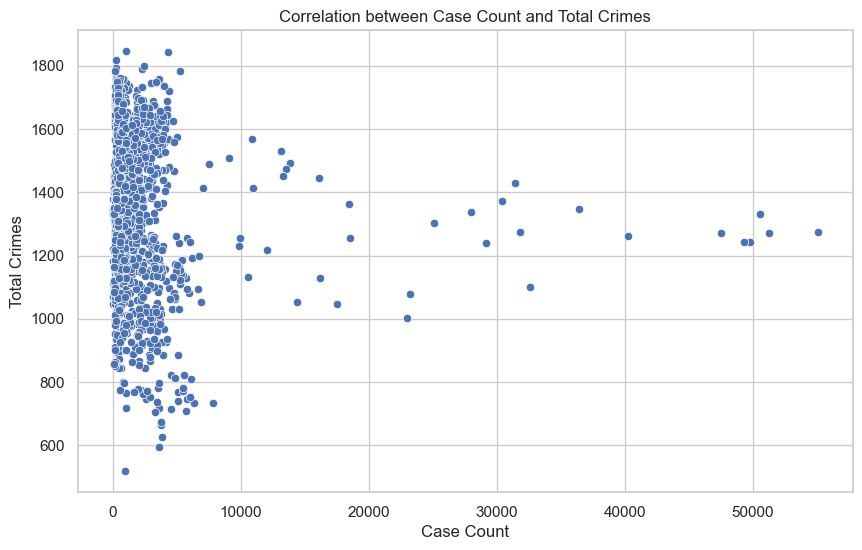

In [56]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='case_count', y='total_crimes', data=merged_df_corona_crime)

# Adding title and labels
plt.title('Correlation between Case Count and Total Crimes')
plt.xlabel('Case Count')
plt.ylabel('Total Crimes')

# Show the plot
plt.show()

In [57]:
correlation_coefficient = merged_df_corona_crime['case_count'].corr(merged_df_corona_crime['total_crimes'])
print(f"The Pearson correlation coefficient between case count and total crimes is: {correlation_coefficient:.2f}")

The Pearson correlation coefficient between case count and total crimes is: -0.08


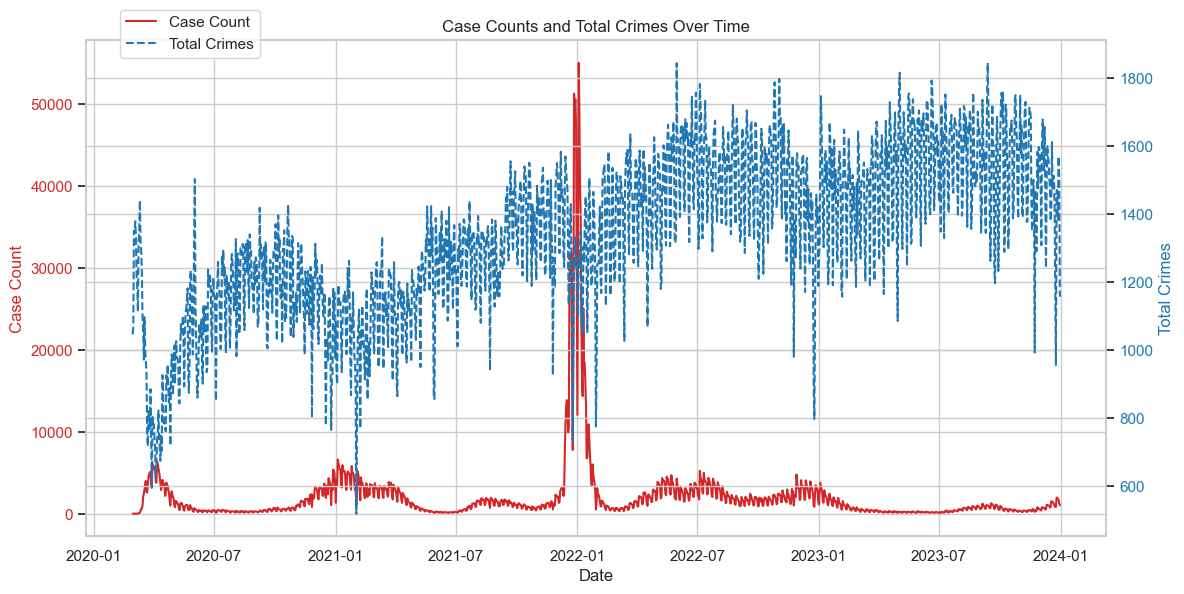

In [58]:
# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the case counts on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Case Count', color=color)
ax1.plot(merged_df_corona_crime['date'], merged_df_corona_crime['case_count'], color=color, label='Case Count')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Total Crimes', color=color)  
ax2.plot(merged_df_corona_crime['date'], merged_df_corona_crime['total_crimes'], color=color, label='Total Crimes', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Case Counts and Total Crimes Over Time')
fig.tight_layout()  # Adjust layout to make room for the legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 1))

# Show the plot
plt.show()

# Correlation in 2020

In [59]:
df_2021 = merged_df_corona_crime[(merged_df_corona_crime['date'] >= '2020-01-01') & (merged_df_corona_crime['date'] <= '2020-12-31')]


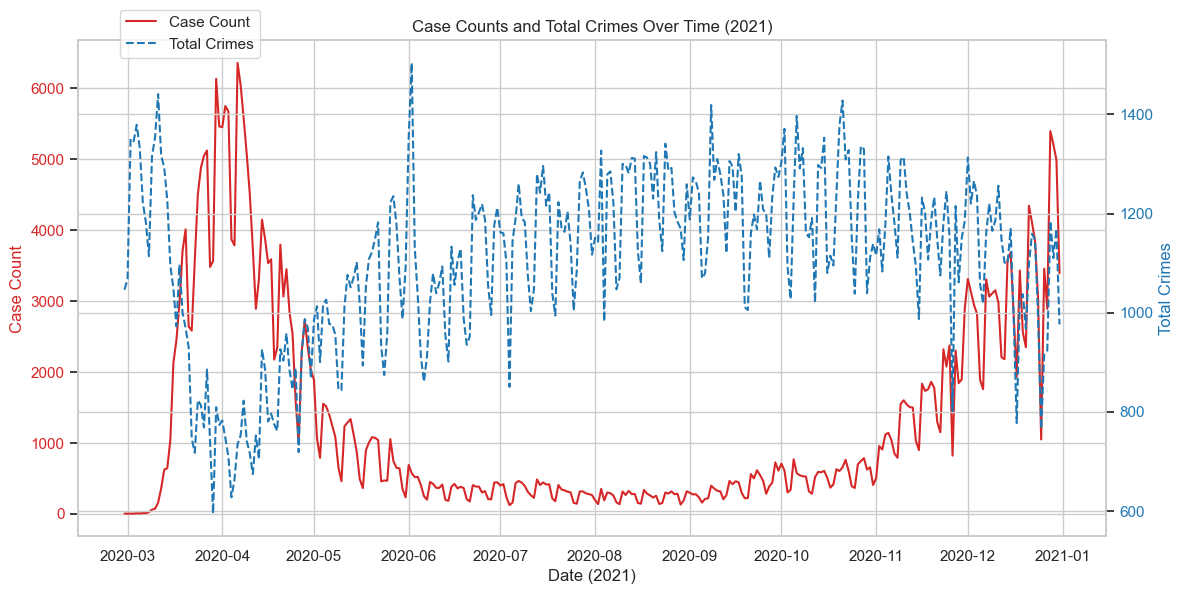

In [60]:
# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the case counts on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date (2021)')
ax1.set_ylabel('Case Count', color=color)
ax1.plot(df_2021['date'], df_2021['case_count'], color=color, label='Case Count')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Total Crimes', color=color)  
ax2.plot(df_2021['date'], df_2021['total_crimes'], color=color, label='Total Crimes', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Case Counts and Total Crimes Over Time (2021)')
fig.tight_layout()  # Adjust layout to make room for the legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 1))

# Show the plot
plt.show()

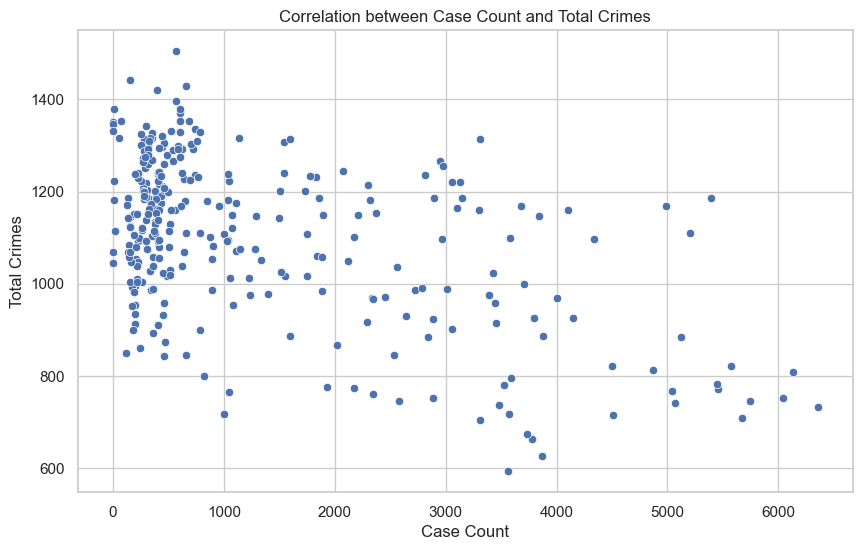

In [61]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='case_count', y='total_crimes', data=df_2021)

# Adding title and labels
plt.title('Correlation between Case Count and Total Crimes')
plt.xlabel('Case Count')
plt.ylabel('Total Crimes')

# Show the plot
plt.show()

In [ ]:
correlation_coefficient = df_2021['case_count'].corr(df_2021['total_crimes'])
print(f"The Pearson correlation coefficient between case count and total crimes is: {correlation_coefficient:.2f}")

The Pearson correlation coefficient between case count and total crimes is: -0.54


# Crime data with occurance date

In [83]:
df_crime_data

,report_date,crime_date,borough,offense,offense_category,crime_type,incident_location,location_category,precinct,jurisdiction,sus_age_group,sus_race,sus_sex,vic_age_group,vic_race,vic_sex,latitude,longitude
0,2022-12-09,2022-12-06,Brooklyn,PETIT LARCENY,Property,Misdemeanor,RESIDENCE-HOUSE,Residential,62,N.Y.P.D.,Unknown,Unknown,Unknown,18-24,Asian,Male,40.606925,-74.011195
1,2022-12-09,2022-12-09,Staten Island,MISCELLANEOUS PENAL LAW,Miscellaneous,Felony,STREET,Public Areas,123,N.Y.P.D.,Unknown,White,Male,25-44,White,Female,40.544084,-74.175782
2,2022-12-09,2022-12-07,Manhattan,GRAND LARCENY,Property,Felony,CHAIN STORE,Shops,17,N.Y.P.D.,25-44,Hispanic,Male,Unknown,Unknown,Business,40.750432,-73.974690
3,2022-12-09,2022-12-09,Brooklyn,VEHICLE AND TRAFFIC LAWS,Traffic,Misdemeanor,STREET,Public Areas,70,N.Y.P.D.,25-44,Black,Male,Unknown,Unknown,PSNY,40.652557,-73.960422
4,2022-12-09,2022-08-03,Brooklyn,PETIT LARCENY,Property,Misdemeanor,RESIDENCE - APT. HOUSE,Residential,66,N.Y.P.D.,Unknown,Unknown,Unknown,25-44,Unknown,Female,40.640089,-73.970040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8912000,2022-12-09,2022-12-07,Manhattan,FORGERY,Property,Felony,RESIDENCE - PUBLIC HOUSING,Residential,23,N.Y. Housing Police,Unknown,Unknown,Unknown,65+,Black,Male,40.788824,-73.951937
8912001,2022-12-09,2022-12-09,Manhattan,OFF. AGNST PUB ORD SENSBLTY &,Public Order,Misdemeanor,HOTEL/MOTEL,Commercial Buildings,1,N.Y.P.D.,25-44,White,Female,25-44,White,Male,40.714930,-74.016075
8912002,2022-12-09,2022-12-09,Manhattan,CRIMINAL MISCHIEF & RELATED OF,Public Order,Misdemeanor,BAR/NIGHT CLUB,Entertainment,7,N.Y.P.D.,18-24,Black,Male,Unknown,Unknown,Business,40.718103,-73.988436
8912003,2022-12-09,2022-12-09,Manhattan,PETIT LARCENY,Property,Misdemeanor,DEPARTMENT STORE,Shops,14,N.Y.P.D.,25-44,Black,Male,Unknown,Unknown,Business,40.750423,-73.989280


In [66]:
# Convert the 'crime_date' column to datetime if it's not already
df_crime_data['crime_date'] = pd.to_datetime(df_crime_data['crime_date'])

# Group by the date part of 'crime_date' and count the number of crimes per day
crime_counts_per_day_occurance = df_crime_data.groupby(df_crime_data['crime_date'].dt.date).size()

# Rename the resulting series for clarity
crime_counts_per_day_occurance.rename('total_crimes', inplace=True)

# Define the date range
start_date = pd.to_datetime('2020-02-29').date()
end_date = pd.to_datetime('2023-12-31').date()

# Filter the series to only include data between the start and end dates
filtered_crime_counts = crime_counts_per_day_occurance.loc[start_date:end_date]

In [68]:
crime_counts_per_day_occurance = crime_counts_per_day_occurance.reset_index(name='total_crimes')


In [69]:
filtered_crime_counts.info

<bound method Series.info of crime_date
2020-02-29    1105
2020-03-01    1345
2020-03-02    1258
2020-03-03    1301
2020-03-04    1310
              ... 
2023-12-27    1174
2023-12-28    1186
2023-12-29    1301
2023-12-30    1285
2023-12-31     860
Name: total_crimes, Length: 1402, dtype: int64>

In [72]:
# Convert the Series to a DataFrame and reset the index
filtered_crime_counts_df = filtered_crime_counts.reset_index()

# Rename the index to 'crime_date' if necessary
filtered_crime_counts_df.columns = ['crime_date', 'total_crimes']

# Ensure the 'crime_date' column is of datetime type
filtered_crime_counts_df['crime_date'] = pd.to_datetime(filtered_crime_counts_df['crime_date'])

# Ensure the 'date' column in df_corona_daily_2023 is of datetime type
df_corona_daily_2023['date'] = pd.to_datetime(df_corona_daily_2023['date'])

# Now merge the DataFrames on the same column type
merged_df_corona_crime_date = pd.merge(
    filtered_crime_counts_df, 
    df_corona_daily_2023, 
    left_on='crime_date', 
    right_on='date', 
    how='inner'
)

/var/folders/p1/0msy8v1j5pj97kvknyjtp3600000gn/T/ipykernel_2018/506840991.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corona_daily_2023['date'] = pd.to_datetime(df_corona_daily_2023['date'])


In [74]:
merged_df_corona_crime_date.head()

,crime_date,total_crimes,date,case_count,death_count,case_count_7day_avg,death_count_7day_avg,bx_case_count,bx_death_count,bx_case_count_7day_avg,...,qn_case_count,qn_death_count,qn_case_count_7day_avg,qn_all_case_count_7day_avg,qn_death_count_7day_avg,si_case_count,si_death_count,si_case_count_7day_avg,si_all_case_count_7day_avg,si_death_count_7day_avg
0,2020-02-29,1105,2020-02-29,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01,1345,2020-03-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,1258,2020-03-02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1301,2020-03-03,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2020-03-04,1310,2020-03-04,5,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


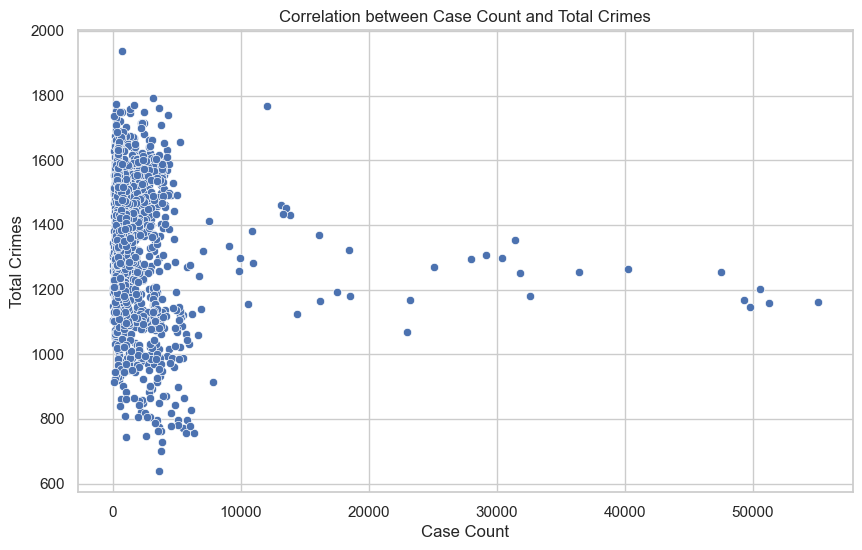

In [75]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='case_count', y='total_crimes', data=merged_df_corona_crime_date)

# Adding title and labels
plt.title('Correlation between Case Count and Total Crimes')
plt.xlabel('Case Count')
plt.ylabel('Total Crimes')

# Show the plot
plt.show()

In [76]:
correlation_coefficient = merged_df_corona_crime_date['case_count'].corr(merged_df_corona_crime_date['total_crimes'])
print(f"The Pearson correlation coefficient between case count and total crimes is: {correlation_coefficient:.2f}")

The Pearson correlation coefficient between case count and total crimes is: -0.11


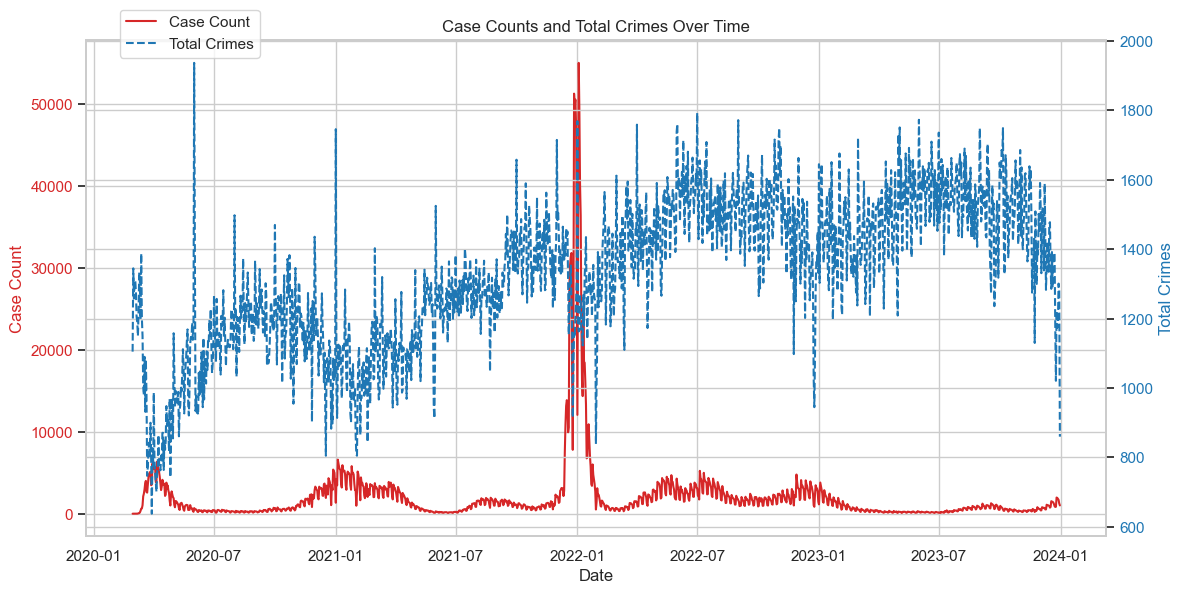

In [77]:
# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the case counts on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Case Count', color=color)
ax1.plot(merged_df_corona_crime['date'], merged_df_corona_crime_date['case_count'], color=color, label='Case Count')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Total Crimes', color=color)  
ax2.plot(merged_df_corona_crime_date['date'], merged_df_corona_crime_date['total_crimes'], color=color, label='Total Crimes', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Case Counts and Total Crimes Over Time')
fig.tight_layout()  # Adjust layout to make room for the legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 1))

# Show the plot
plt.show()

#  Correlation in 2020

In [78]:
df_2021_crime_date = merged_df_corona_crime_date[(merged_df_corona_crime_date['date'] >= '2020-01-01') & (merged_df_corona_crime_date['date'] <= '2020-12-31')]


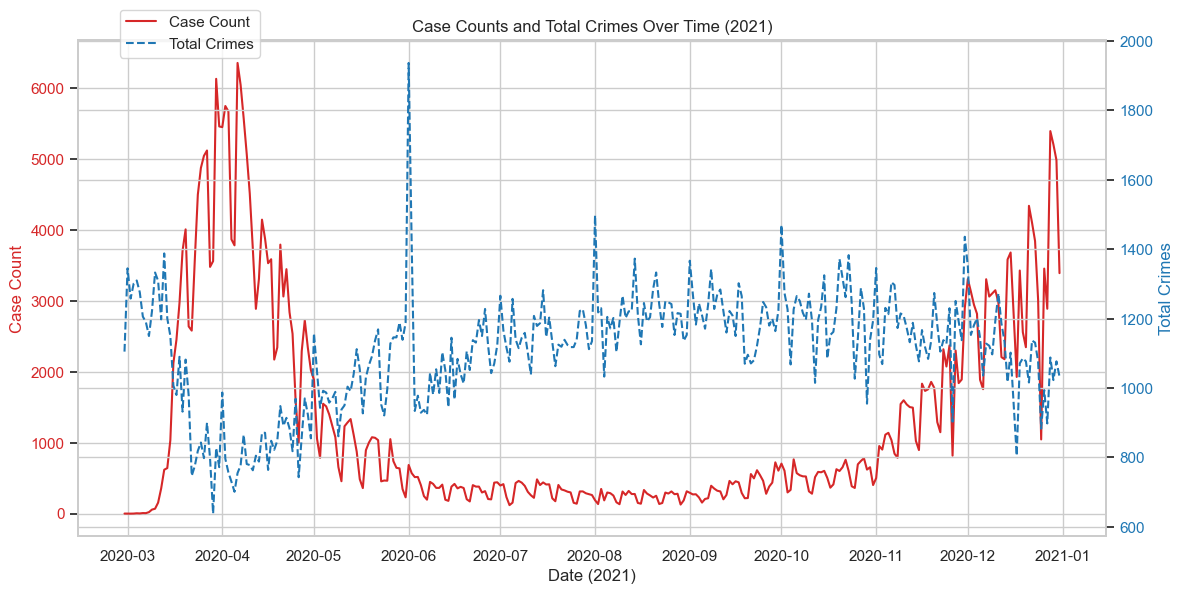

In [79]:
# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the case counts on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date (2021)')
ax1.set_ylabel('Case Count', color=color)
ax1.plot(df_2021_crime_date['date'], df_2021_crime_date['case_count'], color=color, label='Case Count')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Total Crimes', color=color)  
ax2.plot(df_2021_crime_date['date'], df_2021_crime_date['total_crimes'], color=color, label='Total Crimes', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title('Case Counts and Total Crimes Over Time (2021)')
fig.tight_layout()  # Adjust layout to make room for the legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 1))

# Show the plot
plt.show()

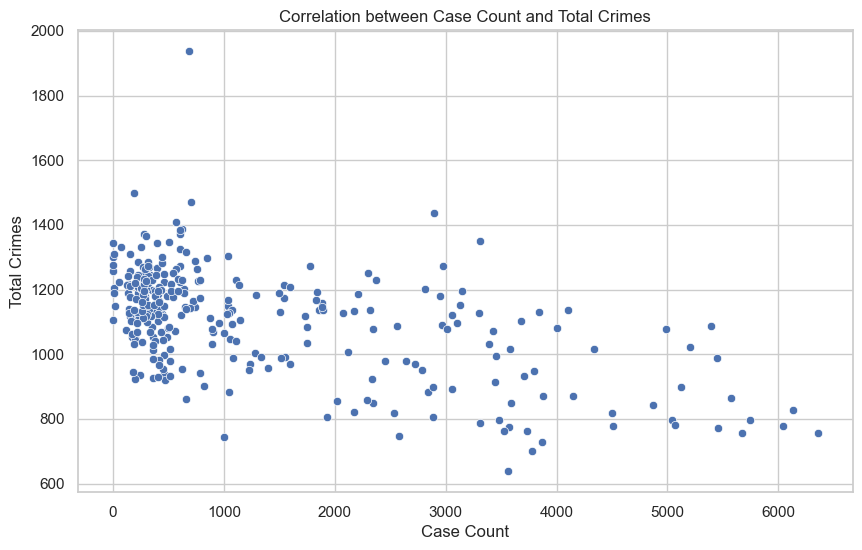

In [80]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='case_count', y='total_crimes', data=df_2021_crime_date)

# Adding title and labels
plt.title('Correlation between Case Count and Total Crimes')
plt.xlabel('Case Count')
plt.ylabel('Total Crimes')

# Show the plot
plt.show()

In [81]:
correlation_coefficient = df_2021_crime_date['case_count'].corr(df_2021_crime_date['total_crimes'])
print(f"The Pearson correlation coefficient between case count and total crimes is: {correlation_coefficient:.2f}")

The Pearson correlation coefficient between case count and total crimes is: -0.56


# Compare two years with Corona and two years without

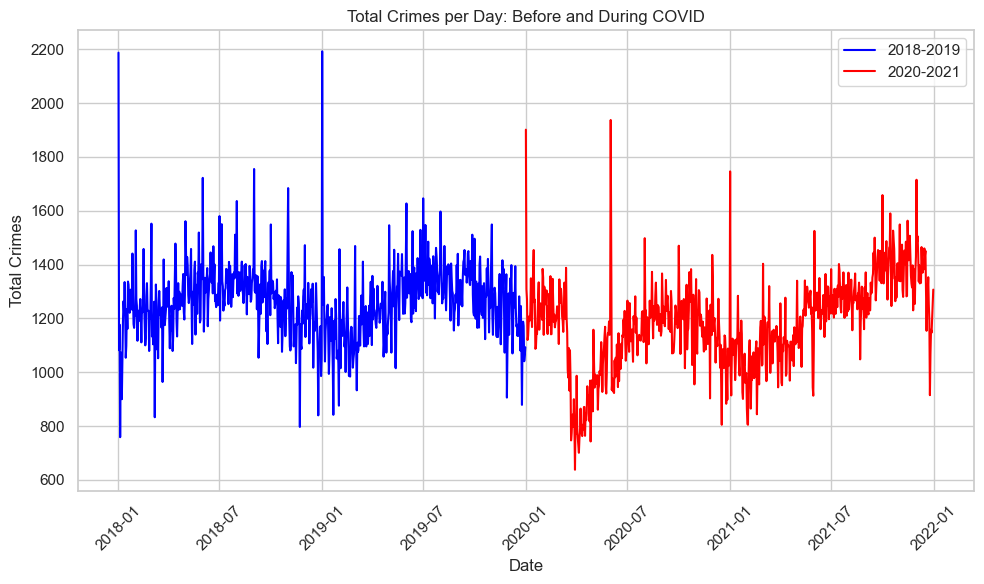

In [90]:
# Ensure 'crime_date' is datetime
df_crime_data['crime_date'] = pd.to_datetime(df_crime_data['crime_date'])

# Filter and aggregate data for the two periods
before_covid_df = df_crime_data[
    (df_crime_data['crime_date'] >= '2018-01-01') &
    (df_crime_data['crime_date'] <= '2019-12-31')
]
during_covid_df = df_crime_data[
    (df_crime_data['crime_date'] >= '2020-01-01') &
    (df_crime_data['crime_date'] <= '2021-12-31')
]

# Group by date for each period
before_covid_summary = before_covid_df.groupby('crime_date').size().reset_index(name='total_crimes')
during_covid_summary = during_covid_df.groupby('crime_date').size().reset_index(name='total_crimes')

# Plotting total crimes per day
plt.figure(figsize=(10, 6))
plt.plot(before_covid_summary['crime_date'], before_covid_summary['total_crimes'], label='2018-2019', color='blue')
plt.plot(during_covid_summary['crime_date'], during_covid_summary['total_crimes'], label='2020-2021', color='red')

plt.xlabel('Date')
plt.ylabel('Total Crimes')
plt.title('Total Crimes per Day: Before and During COVID')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

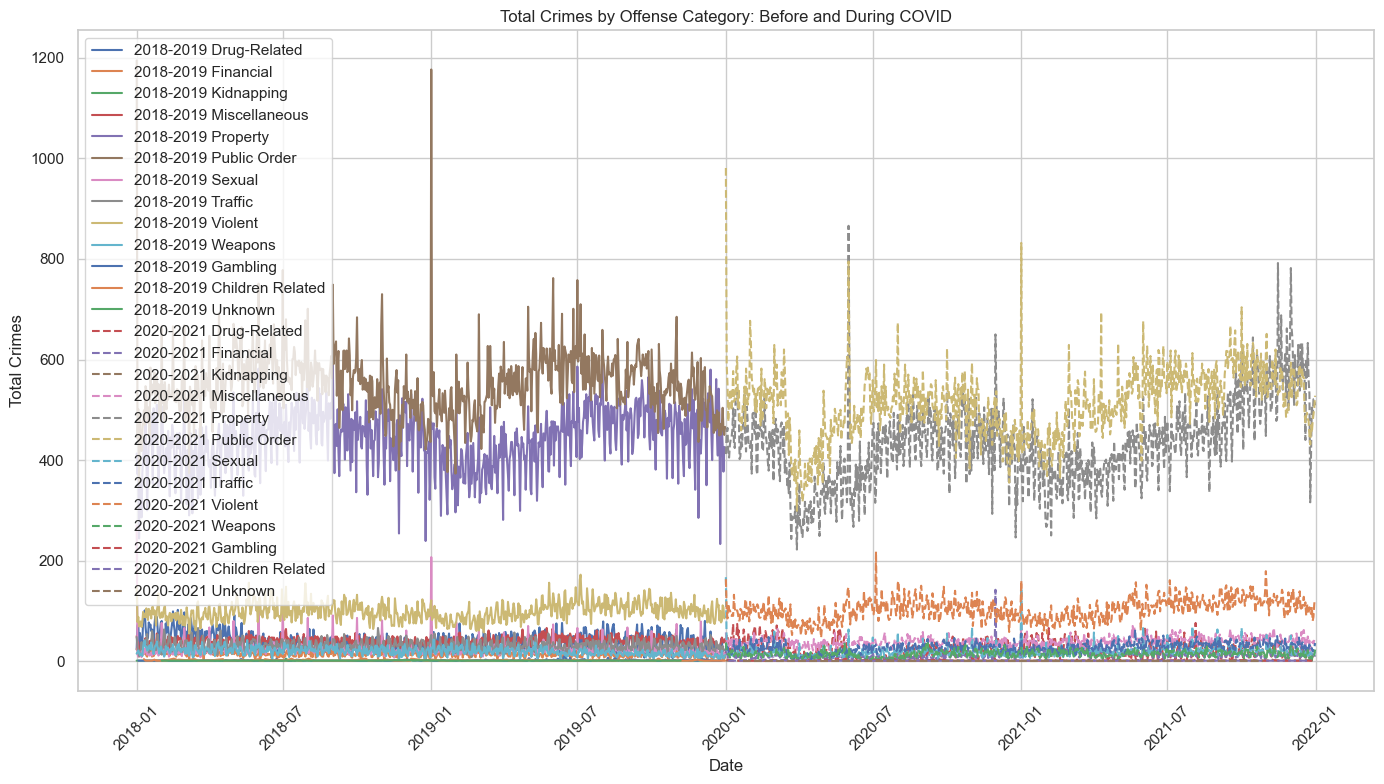

In [91]:
# Group by date and offense category
before_covid_offense = before_covid_df.groupby(['crime_date', 'offense_category']).size().reset_index(name='total_crimes')
during_covid_offense = during_covid_df.groupby(['crime_date', 'offense_category']).size().reset_index(name='total_crimes')

# Plotting offense categories over time
plt.figure(figsize=(14, 8))
for category in before_covid_offense['offense_category'].unique():
    plt.plot(before_covid_offense[before_covid_offense['offense_category'] == category]['crime_date'],
             before_covid_offense[before_covid_offense['offense_category'] == category]['total_crimes'],
             label=f'2018-2019 {category}')

for category in during_covid_offense['offense_category'].unique():
    plt.plot(during_covid_offense[during_covid_offense['offense_category'] == category]['crime_date'],
             during_covid_offense[during_covid_offense['offense_category'] == category]['total_crimes'],
             label=f'2020-2021 {category}', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Offense Category: Before and During COVID')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

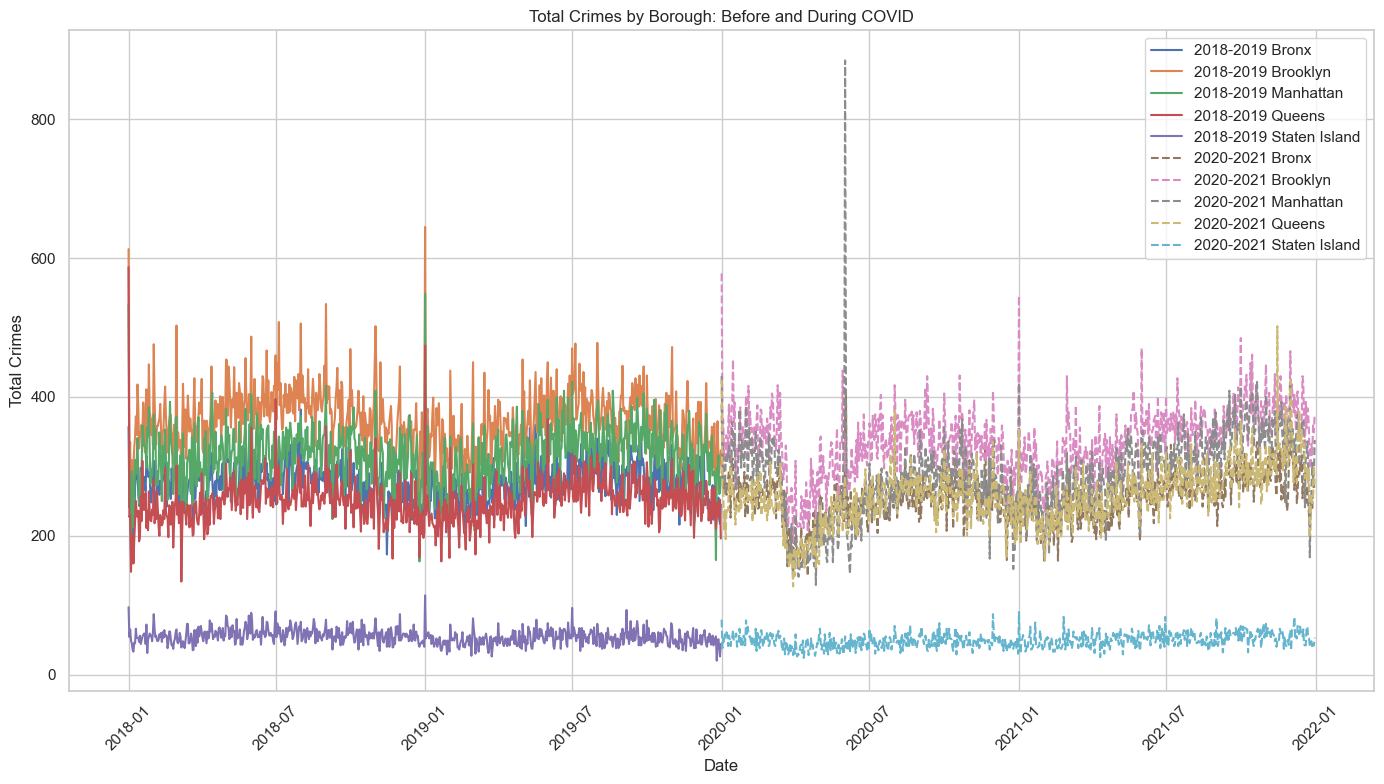

In [93]:
# Group by date and borough
before_covid_borough = before_covid_df.groupby(['crime_date', 'borough']).size().reset_index(name='total_crimes')
during_covid_borough = during_covid_df.groupby(['crime_date', 'borough']).size().reset_index(name='total_crimes')

# Plotting total crimes per day by borough
plt.figure(figsize=(14, 8))
for borough in before_covid_borough['borough'].unique():
    plt.plot(before_covid_borough[before_covid_borough['borough'] == borough]['crime_date'],
             before_covid_borough[before_covid_borough['borough'] == borough]['total_crimes'],
             label=f'2018-2019 {borough}')

for borough in during_covid_borough['borough'].unique():
    plt.plot(during_covid_borough[during_covid_borough['borough'] == borough]['crime_date'],
             during_covid_borough[during_covid_borough['borough'] == borough]['total_crimes'],
             label=f'2020-2021 {borough}', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Borough: Before and During COVID')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

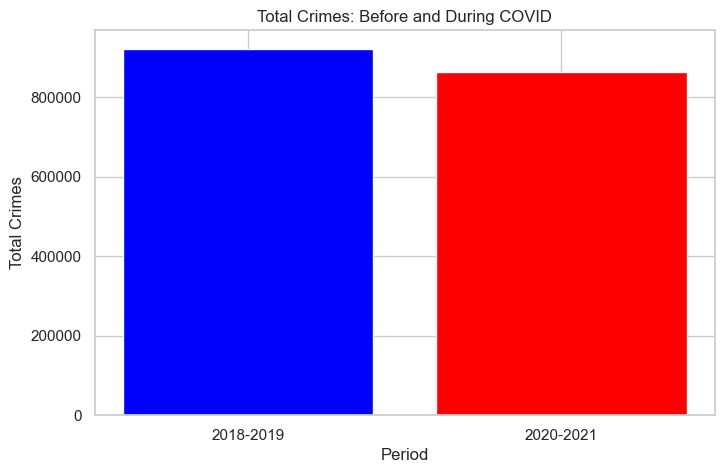

In [94]:
# Ensure 'crime_date' is in datetime format
df_crime_data['crime_date'] = pd.to_datetime(df_crime_data['crime_date'])

# Define the timeframes
before_covid_start = '2018-01-01'
before_covid_end = '2019-12-31'
during_covid_start = '2020-01-01'
during_covid_end = '2021-12-31'

# Filter data for each period
before_covid_df = df_crime_data[
    (df_crime_data['crime_date'] >= before_covid_start) &
    (df_crime_data['crime_date'] <= before_covid_end)
]
during_covid_df = df_crime_data[
    (df_crime_data['crime_date'] >= during_covid_start) &
    (df_crime_data['crime_date'] <= during_covid_end)
]

# Calculate total crimes for each period
total_crimes_before_covid = before_covid_df.shape[0]
total_crimes_during_covid = during_covid_df.shape[0]

# Prepare data for plotting
periods = ['2018-2019', '2020-2021']
total_crimes = [total_crimes_before_covid, total_crimes_during_covid]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.bar(periods, total_crimes, color=['blue', 'red'])
plt.xlabel('Period')
plt.ylabel('Total Crimes')
plt.title('Total Crimes: Before and During COVID')
plt.show()

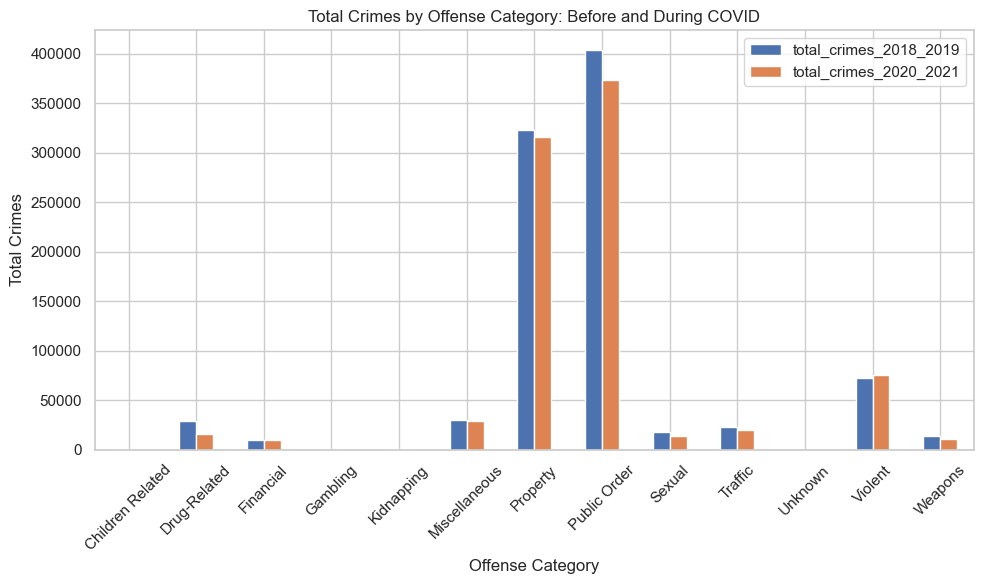

In [99]:
# Ensure 'crime_date' is in datetime format
df_crime_data['crime_date'] = pd.to_datetime(df_crime_data['crime_date'])

# Define the timeframes
before_covid_start = '2018-01-01'
before_covid_end = '2019-12-31'
during_covid_start = '2020-01-01'
during_covid_end = '2021-12-31'

# Filter data for each period
before_covid_df = df_crime_data[
    (df_crime_data['crime_date'] >= before_covid_start) &
    (df_crime_data['crime_date'] <= before_covid_end)
]
during_covid_df = df_crime_data[
    (df_crime_data['crime_date'] >= during_covid_start) &
    (df_crime_data['crime_date'] <= during_covid_end)
]

# Calculate total crimes for each offense category
before_covid_offense = before_covid_df.groupby('offense_category').size().reset_index(name='total_crimes')
during_covid_offense = during_covid_df.groupby('offense_category').size().reset_index(name='total_crimes')

# Merge the data for comparison
offense_comparison = before_covid_offense.merge(during_covid_offense, on='offense_category', suffixes=('_2018_2019', '_2020_2021'))

# Plotting total crimes by offense category
offense_comparison.plot(x='offense_category', kind='bar', figsize=(10, 6))
plt.xlabel('Offense Category')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Offense Category: Before and During COVID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

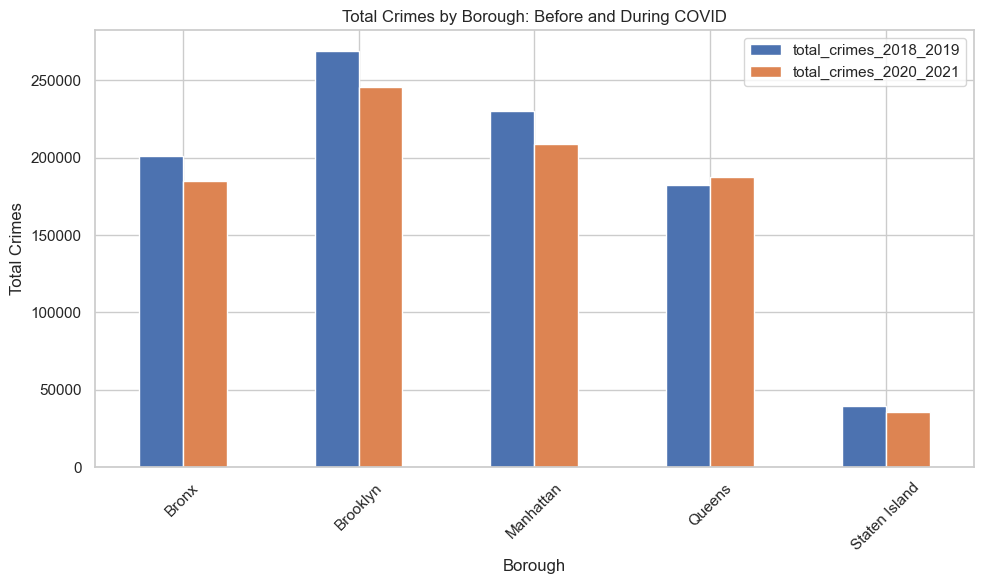

In [100]:
# Calculate total crimes for each borough
before_covid_borough = before_covid_df.groupby('borough').size().reset_index(name='total_crimes')
during_covid_borough = during_covid_df.groupby('borough').size().reset_index(name='total_crimes')

# Merge the data for comparison
borough_comparison = before_covid_borough.merge(during_covid_borough, on='borough', suffixes=('_2018_2019', '_2020_2021'))

# Plotting total crimes by borough
borough_comparison.plot(x='borough', kind='bar', figsize=(10, 6))
plt.xlabel('Borough')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Borough: Before and During COVID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/p1/0msy8v1j5pj97kvknyjtp3600000gn/T/ipykernel_2018/2282174731.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_covid_df['month'] = during_covid_df['crime_date'].dt.to_period('M')


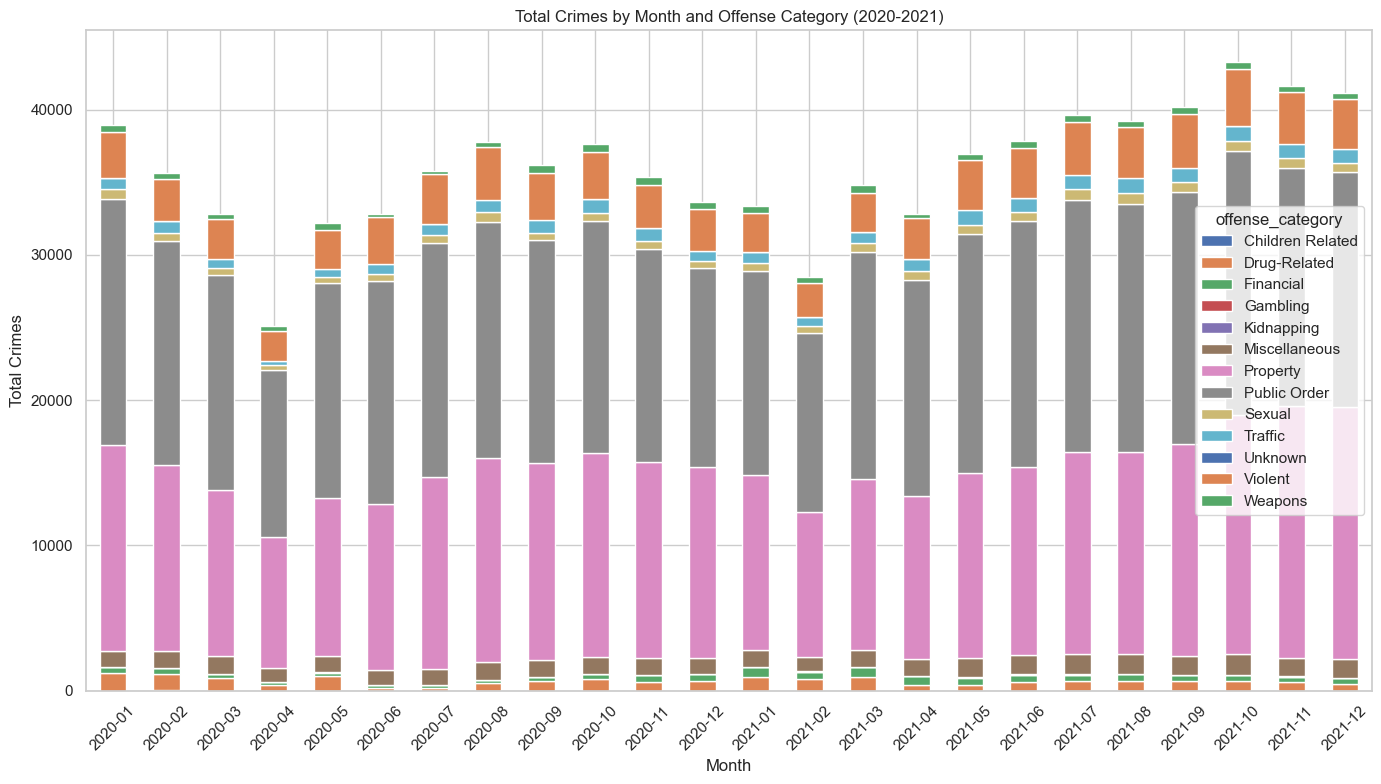

In [102]:
# Ensure 'crime_date' is in datetime format
df_crime_data['crime_date'] = pd.to_datetime(df_crime_data['crime_date'])

# Filter data for the COVID-19 period (2020-2021)
during_covid_df = df_crime_data[
    (df_crime_data['crime_date'] >= '2020-01-01') &
    (df_crime_data['crime_date'] <= '2021-12-31')
]

# Group by year-month and offense category
during_covid_df['month'] = during_covid_df['crime_date'].dt.to_period('M')
monthly_crime = during_covid_df.groupby(['month', 'offense_category']).size().reset_index(name='total_crimes')

# Pivot the data for the stacked bar plot
pivoted_crime = monthly_crime.pivot(index='month', columns='offense_category', values='total_crimes').fillna(0)

# Plot the data
pivoted_crime.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.title('Total Crimes by Month and Offense Category (2020-2021)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [106]:
# Aggregate data before and during COVID by offense category
before_covid_offense = before_covid_df.groupby('offense_category').size().reset_index(name='total_crimes_2018_2019')
during_covid_offense = during_covid_df.groupby('offense_category').size().reset_index(name='total_crimes_2020_2021')

# Merge data for comparison
offense_comparison = pd.merge(before_covid_offense, during_covid_offense, on='offense_category', how='outer').fillna(0)

# Calculate the difference between the two periods
offense_comparison['difference'] = offense_comparison['total_crimes_2020_2021'] - offense_comparison['total_crimes_2018_2019']

# Sort offenses based on the difference to identify the top 5 positive and negative changes
top_positive = offense_comparison.sort_values(by='difference', ascending=False).head(5)
top_negative = offense_comparison.sort_values(by='difference', ascending=True).head(5)

print("Top 5 offense categories with the largest positive development:")
print(top_positive)

print("\nTop 5 offense categories with the largest negative development:")
print(top_negative)

Top 5 offense categories with the largest positive development:
    offense_category  total_crimes_2018_2019  total_crimes_2020_2021  \
11           Violent                   72200                   75313   
10           Unknown                      22                      16   
4         Kidnapping                     254                     233   
0   Children Related                     245                      86   
3           Gambling                     447                     241   

    difference  
11        3113  
10          -6  
4          -21  
0         -159  
3         -206  

Top 5 offense categories with the largest negative development:
   offense_category  total_crimes_2018_2019  total_crimes_2020_2021  \
7      Public Order                  403245                  373616   
1      Drug-Related                   28725                   15953   
6          Property                  322746                  315396   
12          Weapons                   14188         